# Практическая работа №8
### Построить граф знаний по тексту или по набору текстов. Вершинами в графе будут субъекты и объекты отношений над субъектами, связи – отношения между субъектами и объектами.

### Выполнение:
1. Загрузка данных. Собрать корпус текстов самостоятельно или
использовать готовый набор. Подобрать самостоятельно. Желательно,
чтобы в тексте были именованные сущности (например, тексты
новостей).

In [37]:
%pip install ipywidgets
%pip install tqdm
%pip install pandas jupyter pandarallel requests tqdm

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviou

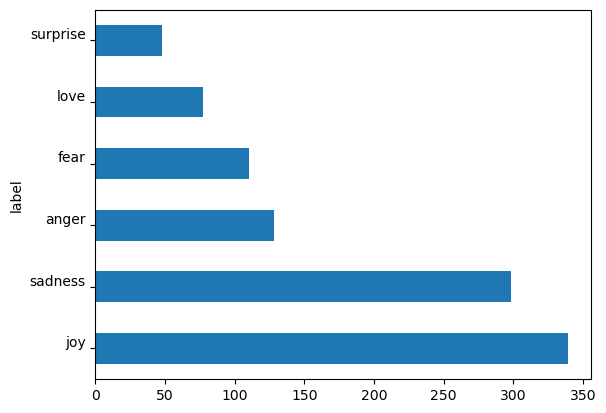

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузите данные train.txt, test.txt, val.txt
with open('./yazik/yazik_lab8/data/train.txt', 'r') as f:
    train = f.readlines()
with open('./yazik/yazik_lab8/data/test.txt', 'r') as f:
    test = f.readlines()
with open('./yazik/yazik_lab8/data/val.txt', 'r') as f:
    val = f.readlines()

# Split data by delimiter (;)
train = [x.split(';') for x in train]
test = [x.split(';') for x in test]
val = [x.split(';') for x in val]

# Переведите данные в формат pandas DataFrame
train = pd.DataFrame(train, columns=['text', 'label'])
test = pd.DataFrame(test, columns=['text', 'label'])
val = pd.DataFrame(val, columns=['text', 'label'])

# Создай 1 общий датасет из train, test, val
data = pd.concat([train, test, val], ignore_index=True)

# 2. Select random 1000 values
data = data.sample(n=1000, random_state=42)

# 3. Выведите график распределения классов (barh)
data['label'].value_counts().plot(kind='barh')
plt.show()

In [44]:
# Filter text by len > 30
print(len(data))
data = data[data['text'].apply(lambda x: len(x) > 30)]
print(len(data))

1000
943


In [57]:
import spacy

nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.